# Evaluating U-Net and simple single convoluation baseline models

In [1]:
%load_ext autoreload

%autoreload 2

In [24]:
%reload_ext autoreload
import os, sys
# dir2 = os.path.abspath('../../src/ml_downscaling_emulator/unet/unet')
# dir1 = os.path.dirname(dir2)
# if not dir1 in sys.path: sys.path.append(dir1)
# import unet
import numpy as np
from ml_downscaling_emulator.evaluation import load_model, predict, open_test_set, compare_preds
from ml_downscaling_emulator.helpers import plots_at_ts
from ml_downscaling_emulator.unet import unet as unet
# weird hack as I moved the unet package foolishly
sys.modules['unet'] = unet

In [3]:
test_sets = {sf: open_test_set(f"../../../../derived_data/nc-datasets/2.2km-coarsened-{sf}x_london_pr/test.nc") for sf in [2, 4, 8, 16, 27]}

In [4]:
model_job_ids = {
    "simple-conv": {
        2: 237016,
        4: 237015,
        8: 237014,
        16: 237013,
        27: 237012,
    },
    "u-net": {
        2: 237007,
        4: 237008,
        8: 237009,
        16: 237010,
        27: 237011,
    }
}

model_paths = {arch: {sf: f'../../checkpoints/{arch}/{job_id}/model-epoch199.pth' for sf, job_id in jobs.items()} for arch, jobs in model_job_ids.items()}

preds = {}

In [5]:
preds["simple-conv"] = {sf: predict(load_model(model_path), test_sets[sf]) for sf, model_path in model_paths["simple-conv"].items()}

In [6]:
preds["u-net"] = {sf: predict(load_model(model_path), test_sets[sf]) for sf, model_path in model_paths["u-net"].items()}

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448222085/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## 2x coarsened

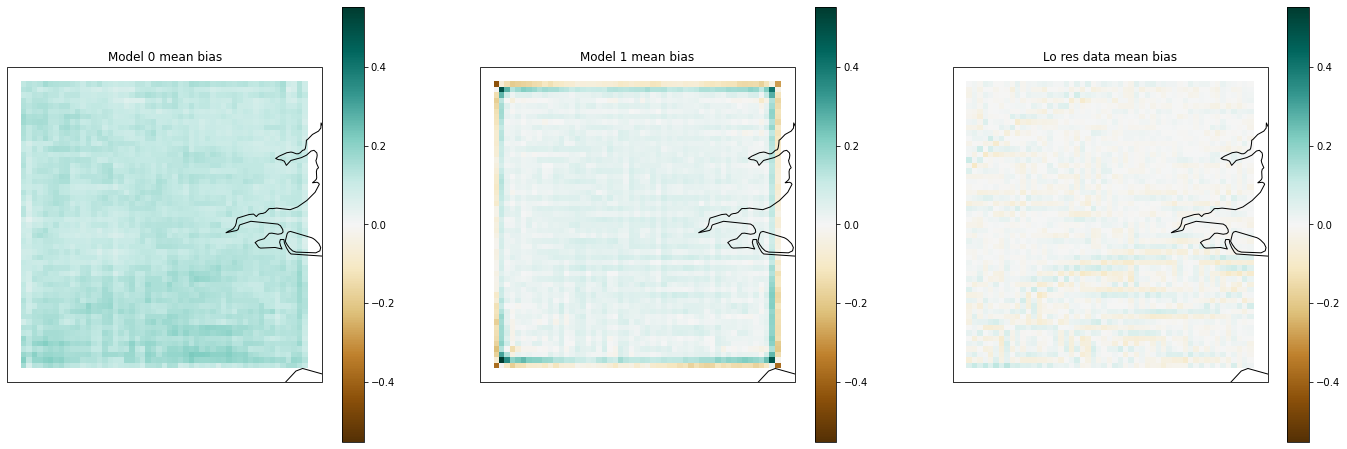

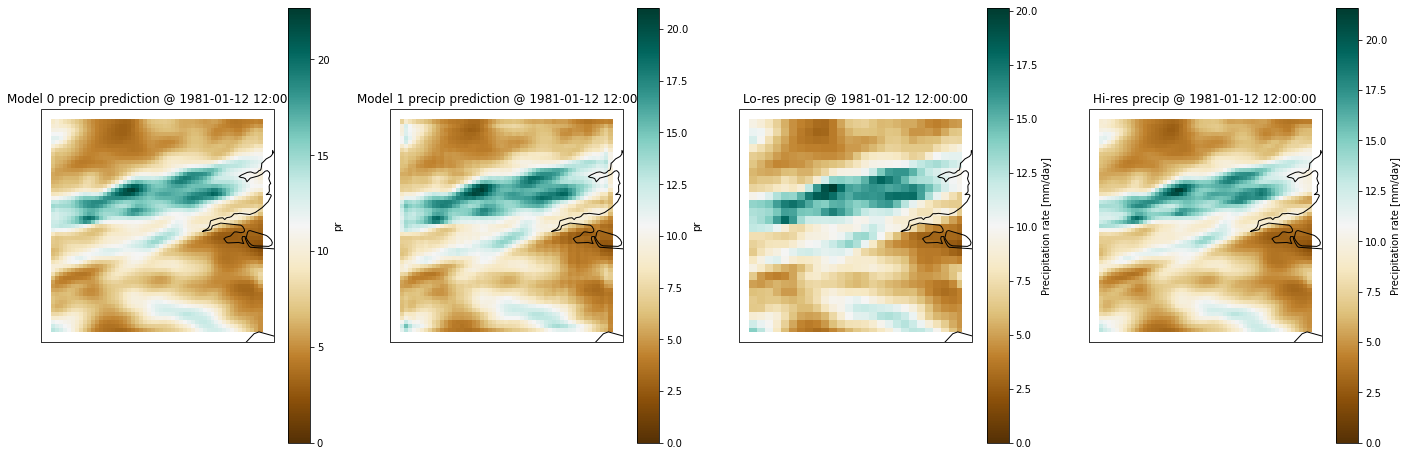

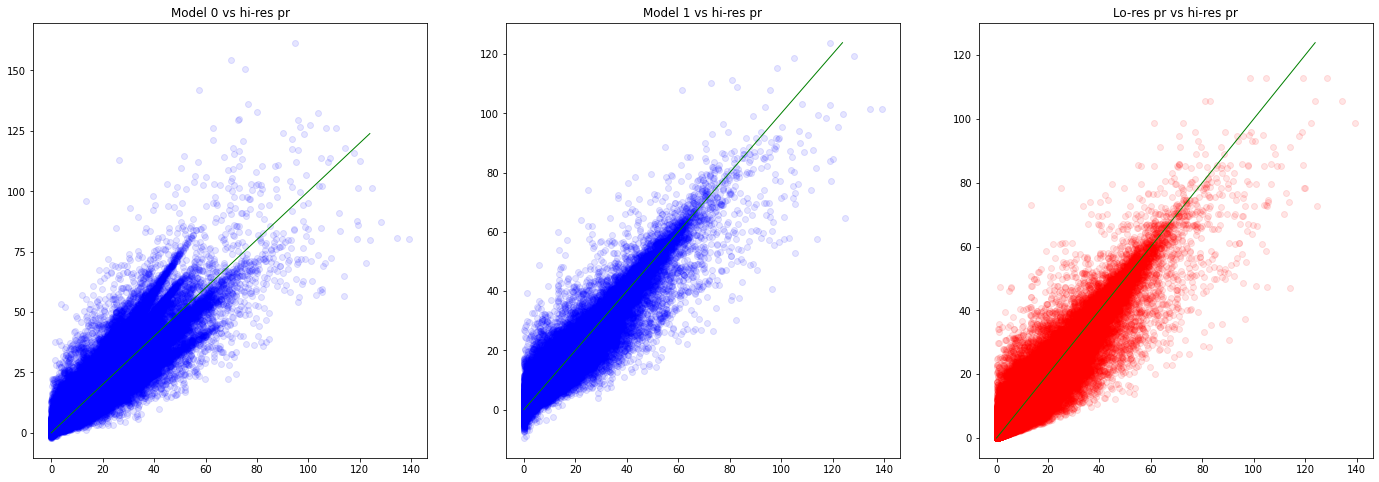

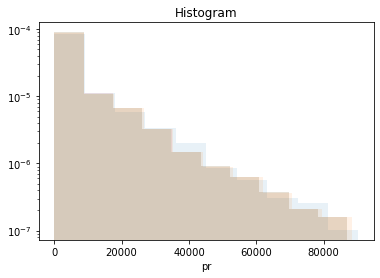

In [7]:
compare_preds([preds["u-net"][2], preds["simple-conv"][2]], test_sets[2])

## 4x coarsened

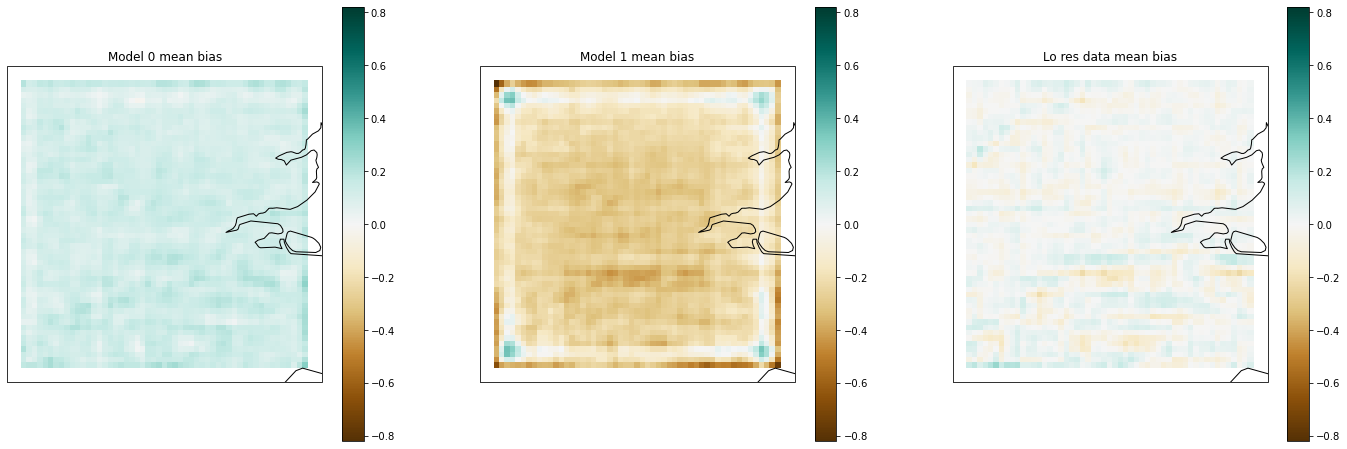

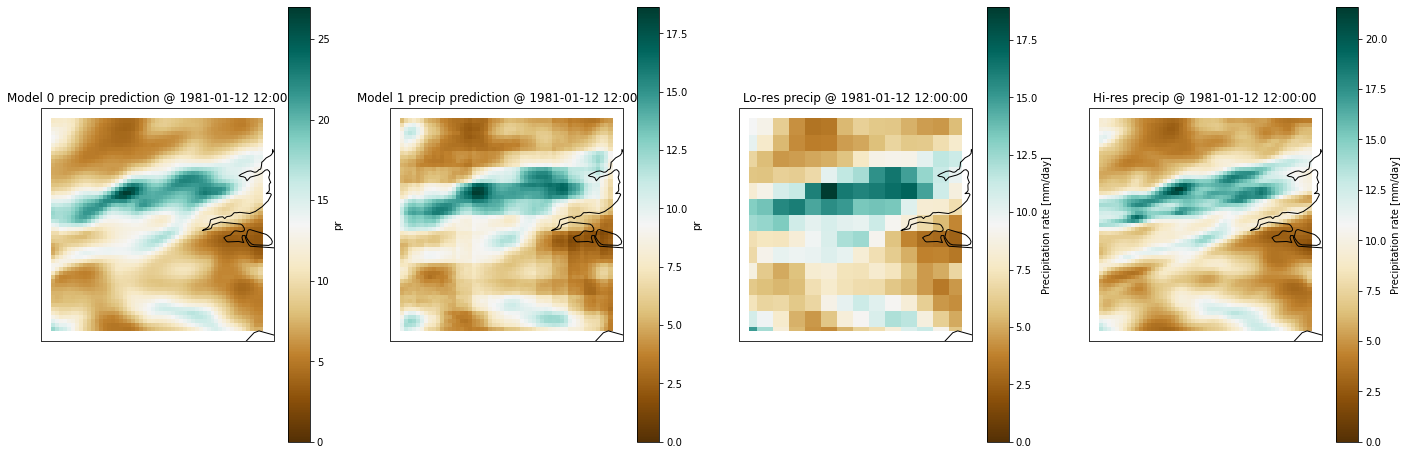

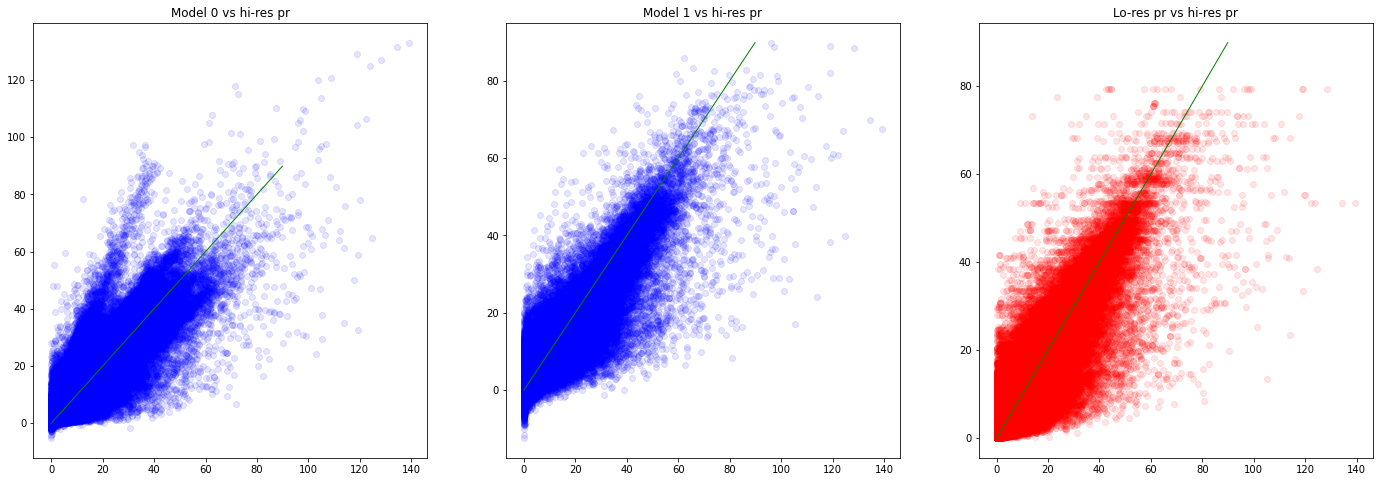

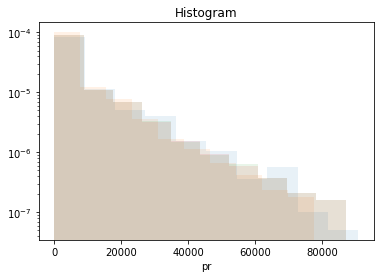

In [8]:
compare_preds([preds["u-net"][4], preds["simple-conv"][4]], test_sets[4])

## 8x coarsened

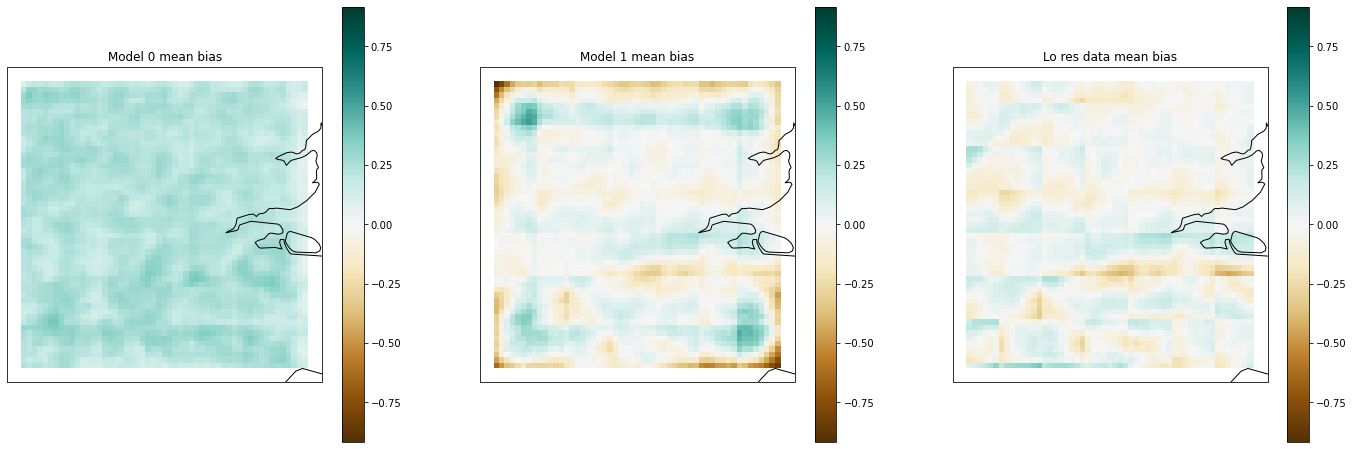

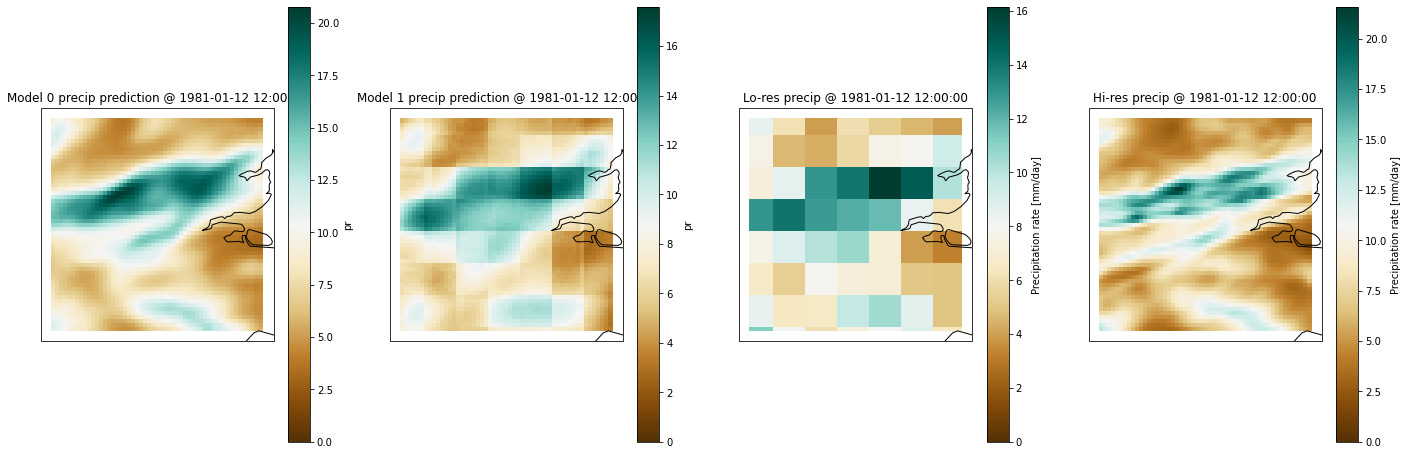

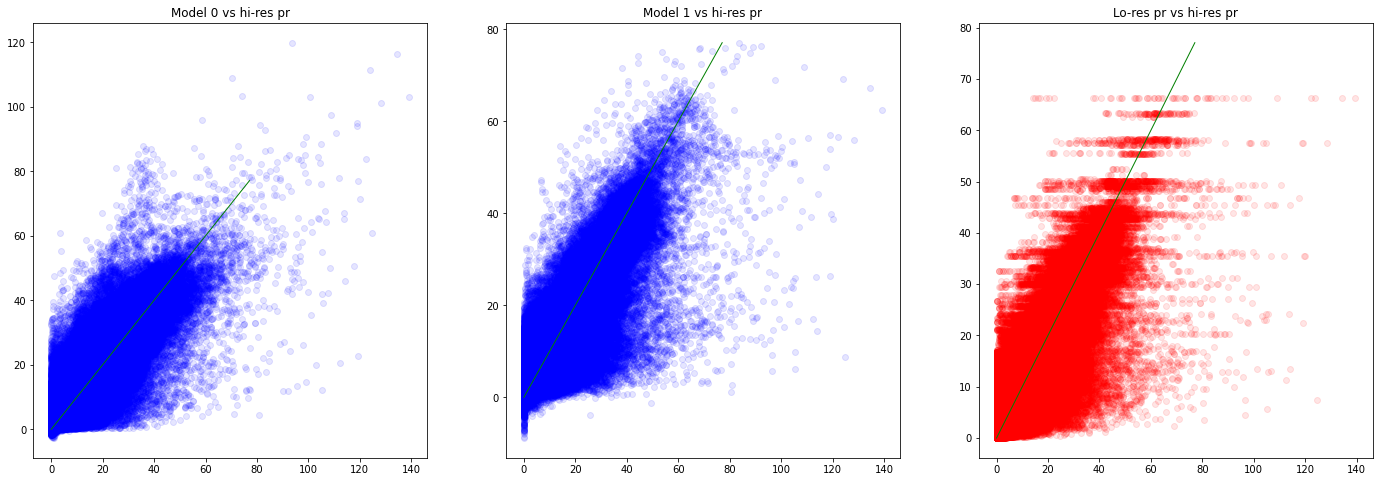

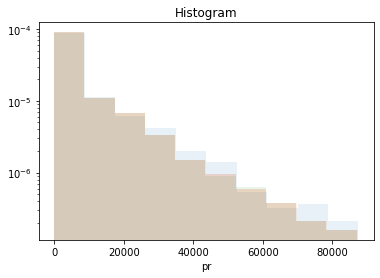

In [9]:
compare_preds([preds["u-net"][8], preds["simple-conv"][8]], test_sets[8])

## 16x coarsened

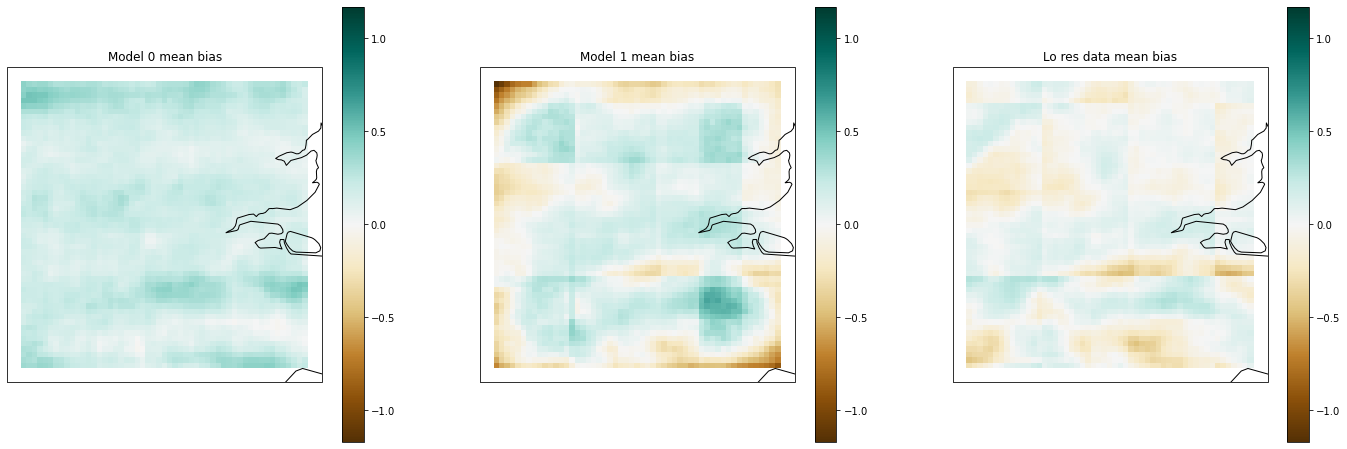

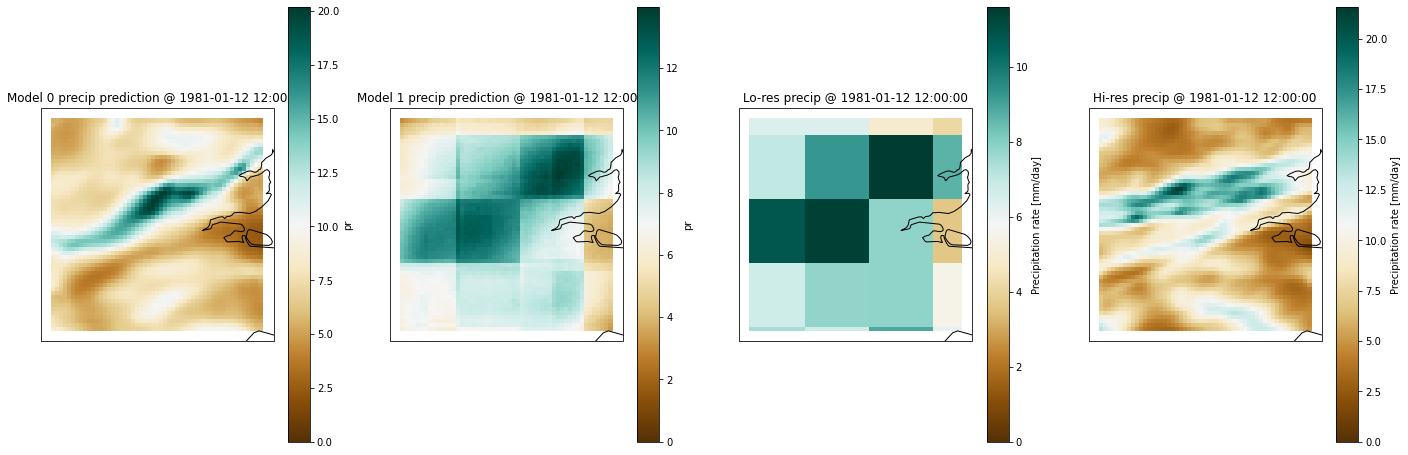

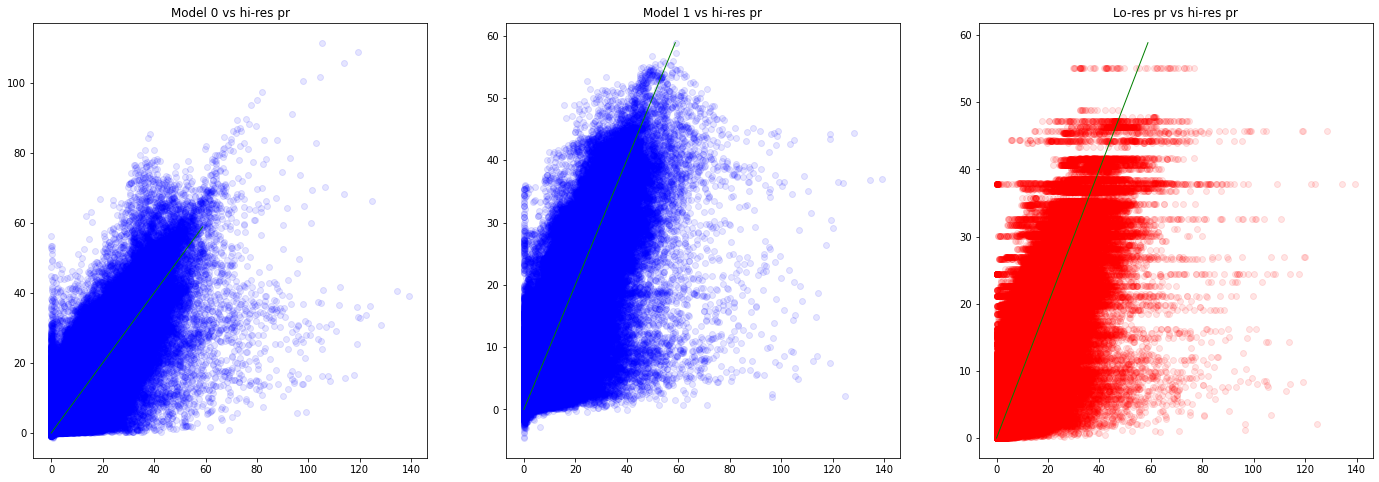

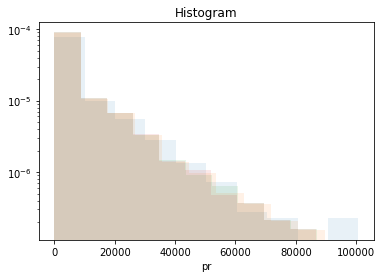

In [10]:
compare_preds([preds["u-net"][16], preds["simple-conv"][16]], test_sets[16])

## 27x coarsened (~GCM resolution)

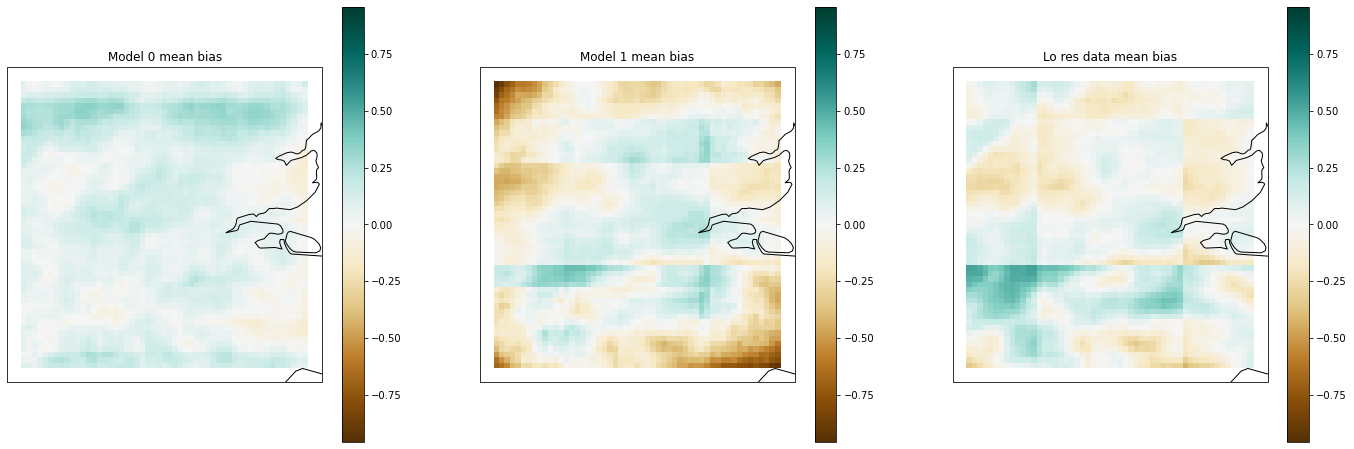

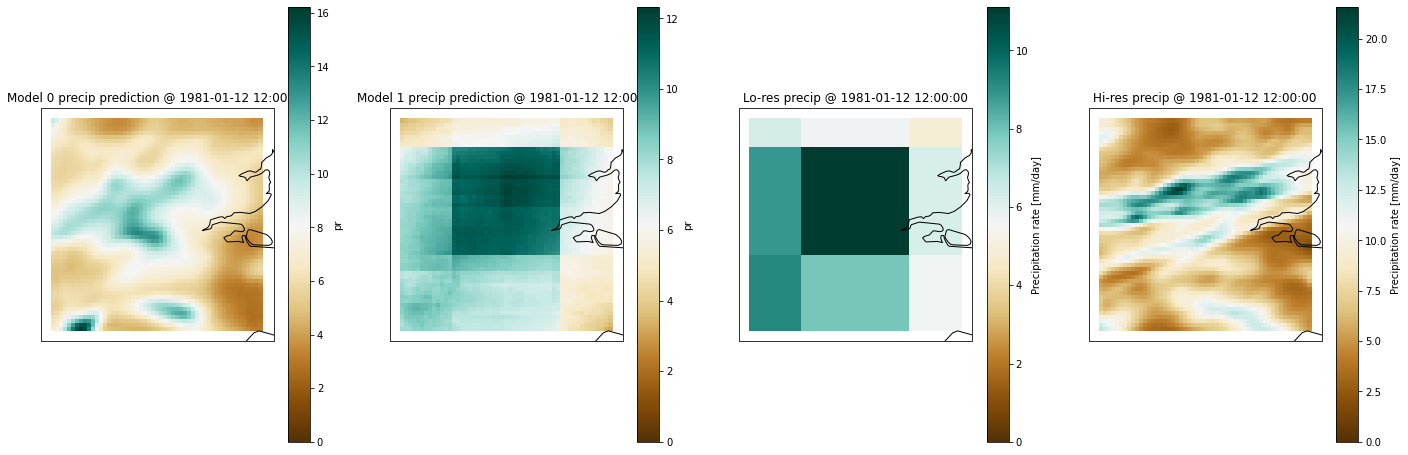

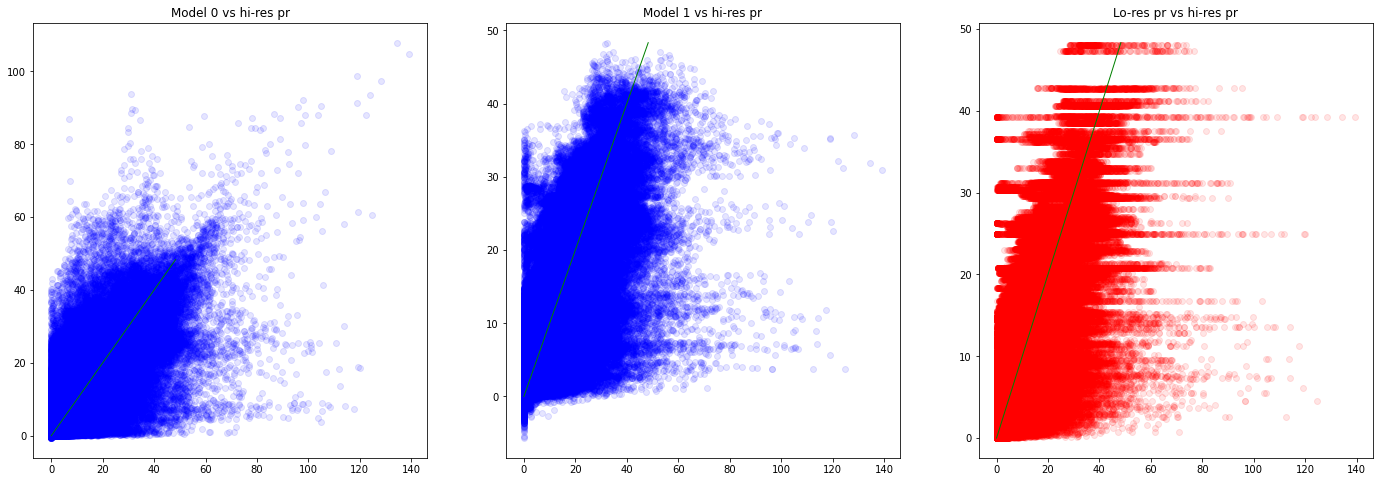

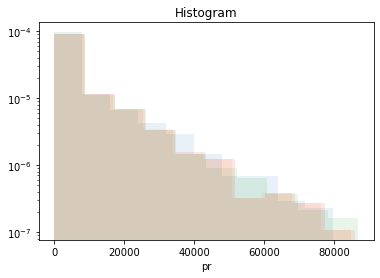

In [11]:
compare_preds([preds["u-net"][27], preds["simple-conv"][27]], test_sets[27])

## Comparing U-Nets with different coarsening scale factors

Plotted below are the U-Net predictions for the 5 different scale factors and beneath them the corresponding coarsened input. The first column is the target precipitation of the full-resolution CPM output.

There are two rows for 10 randomly selected timestamps from the test set.

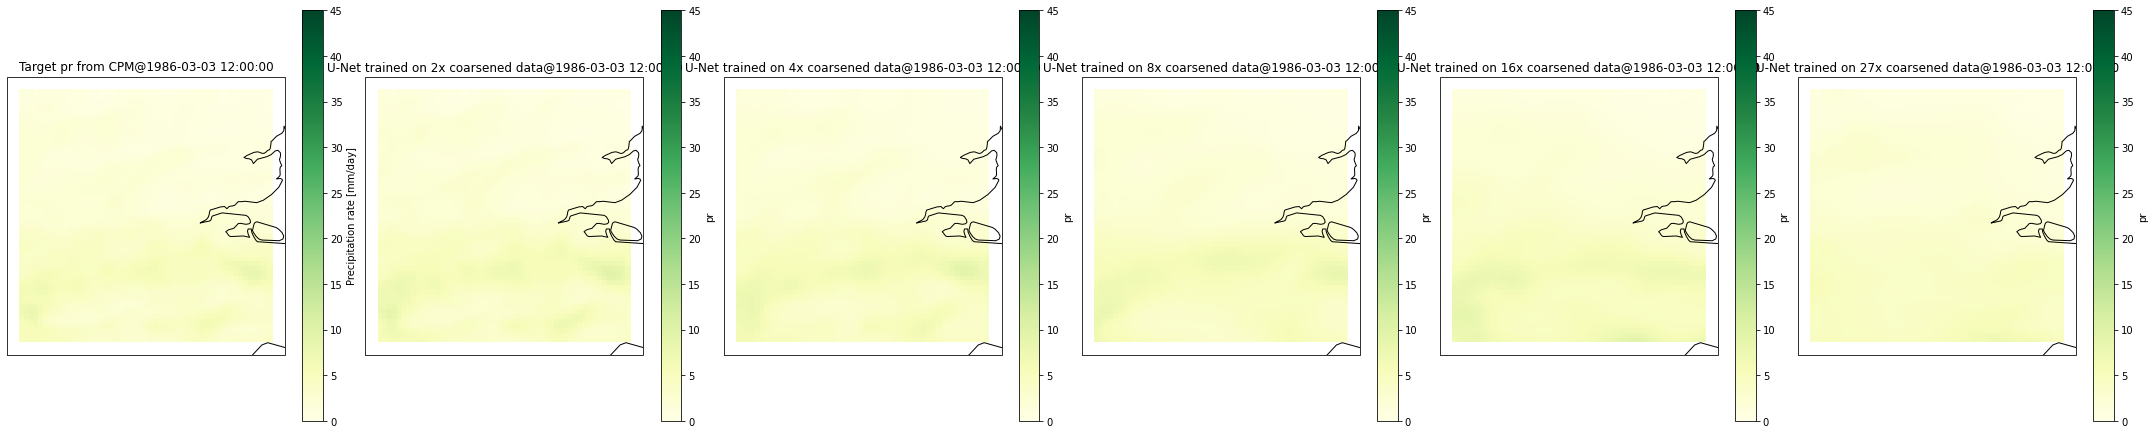

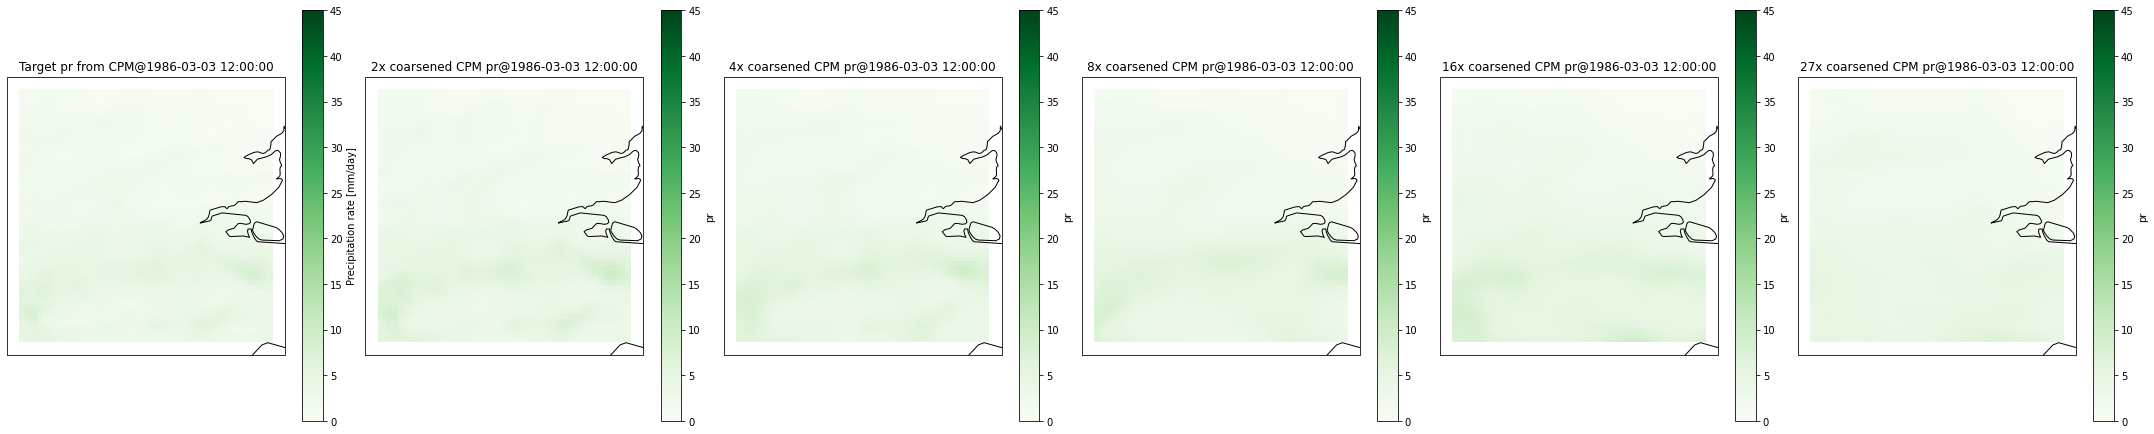

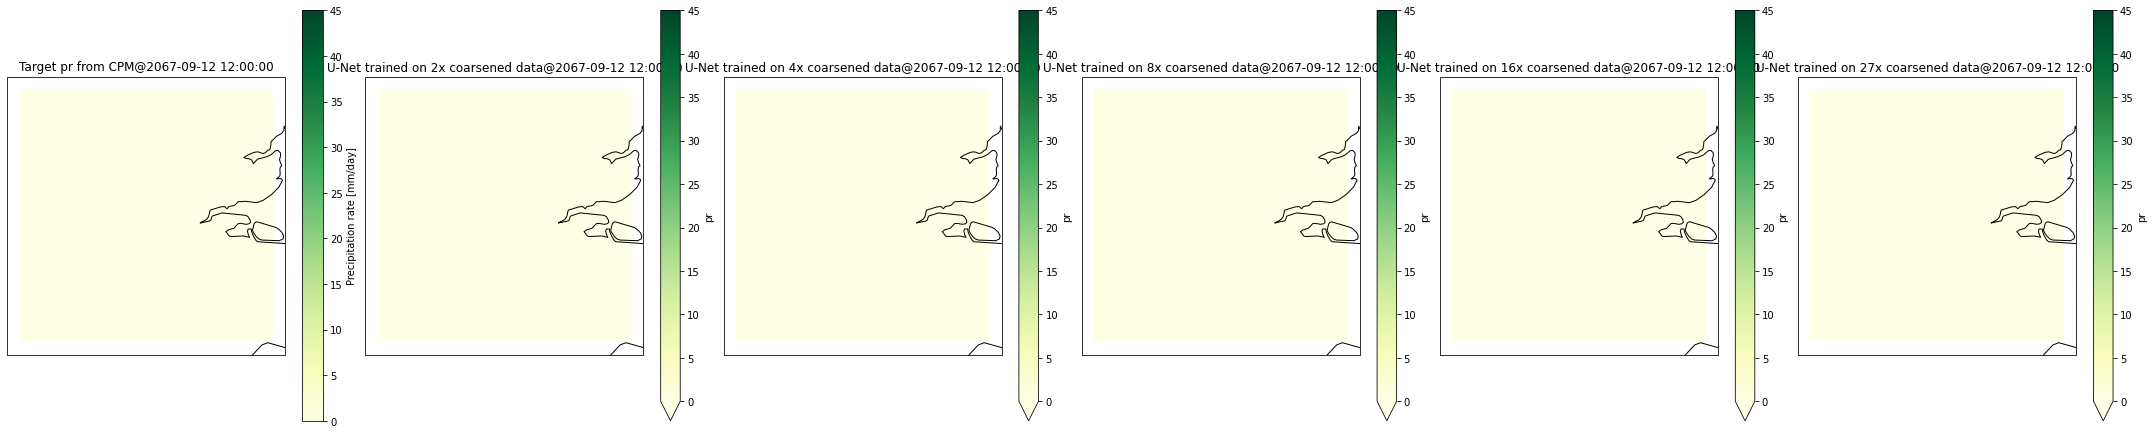

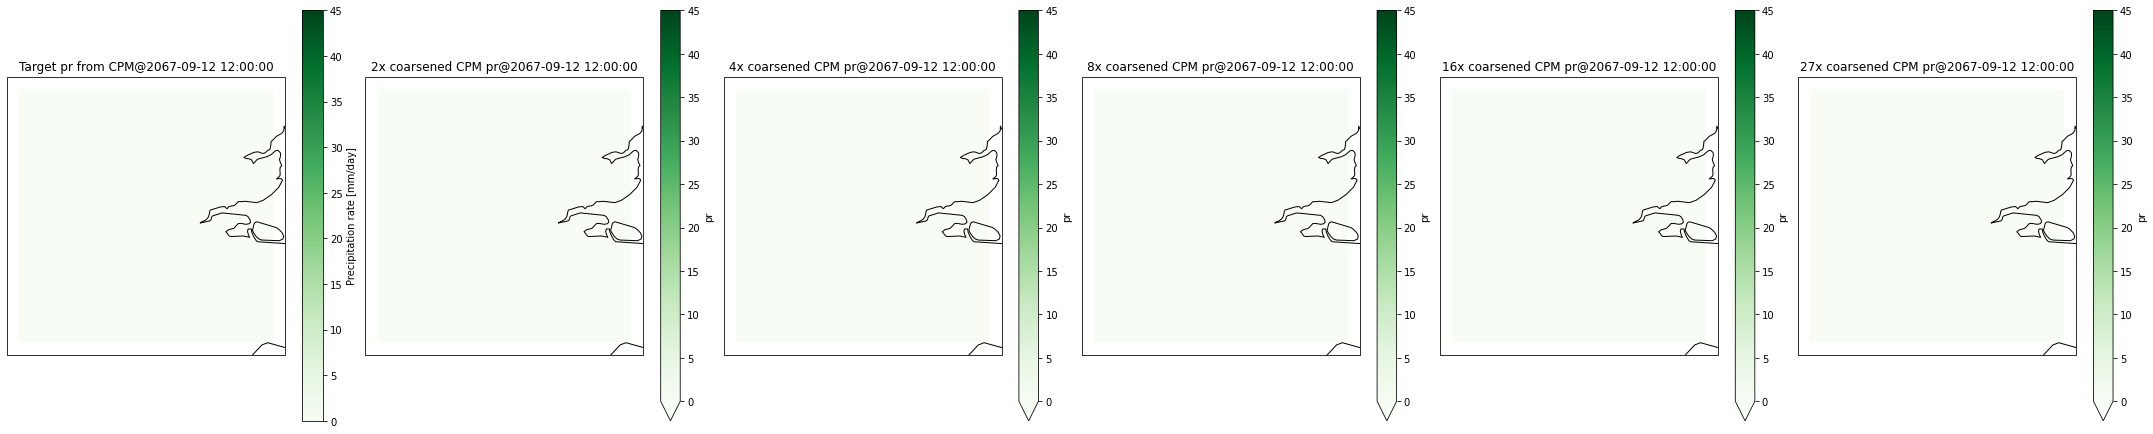

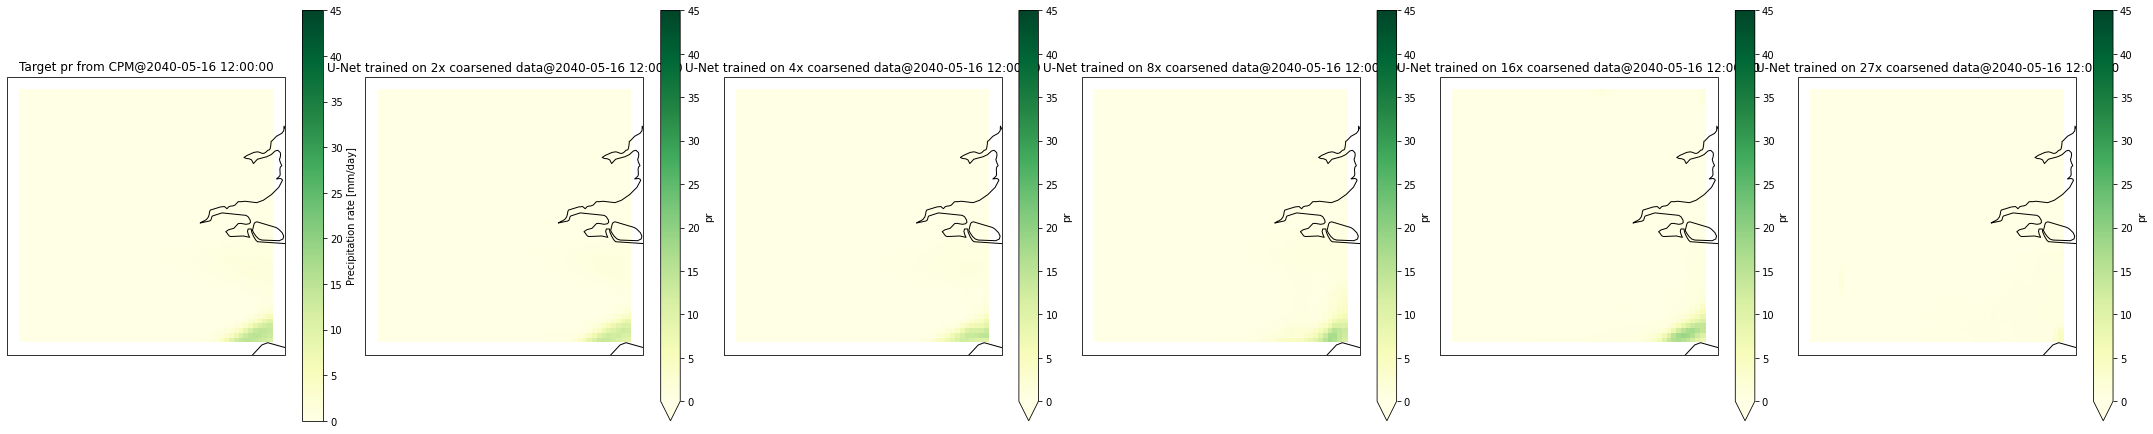

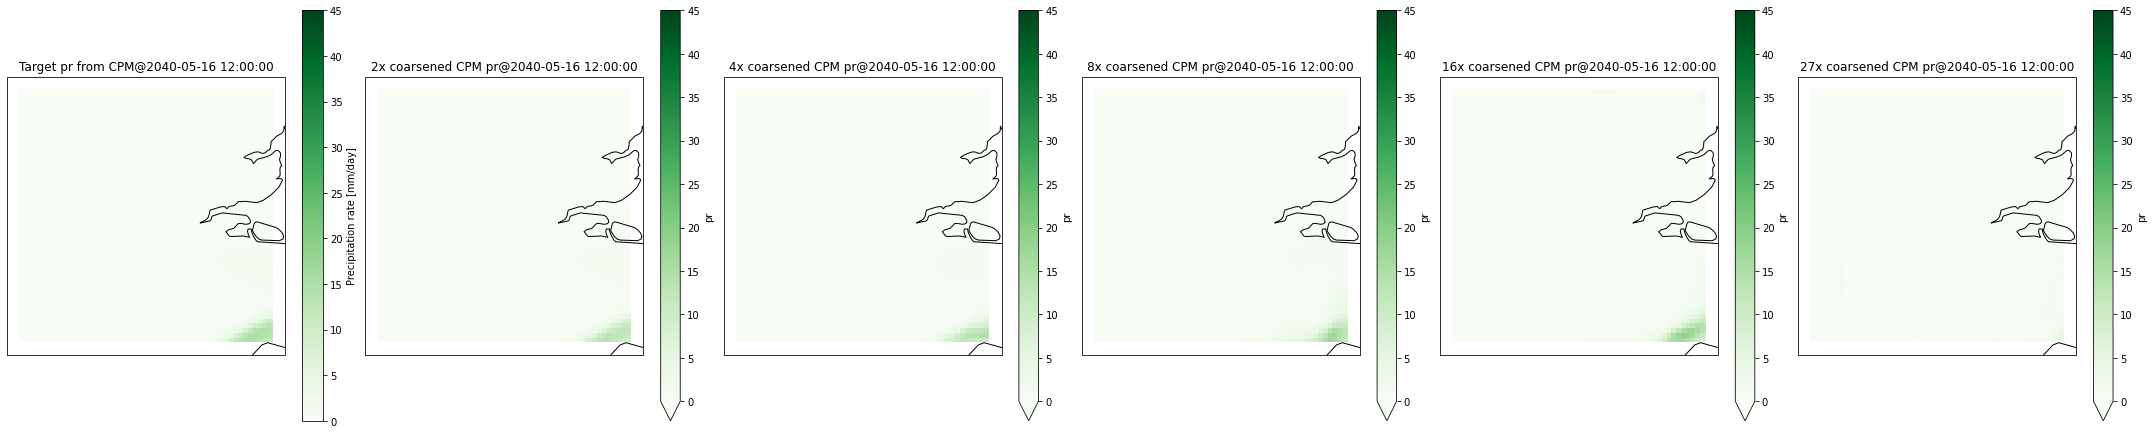

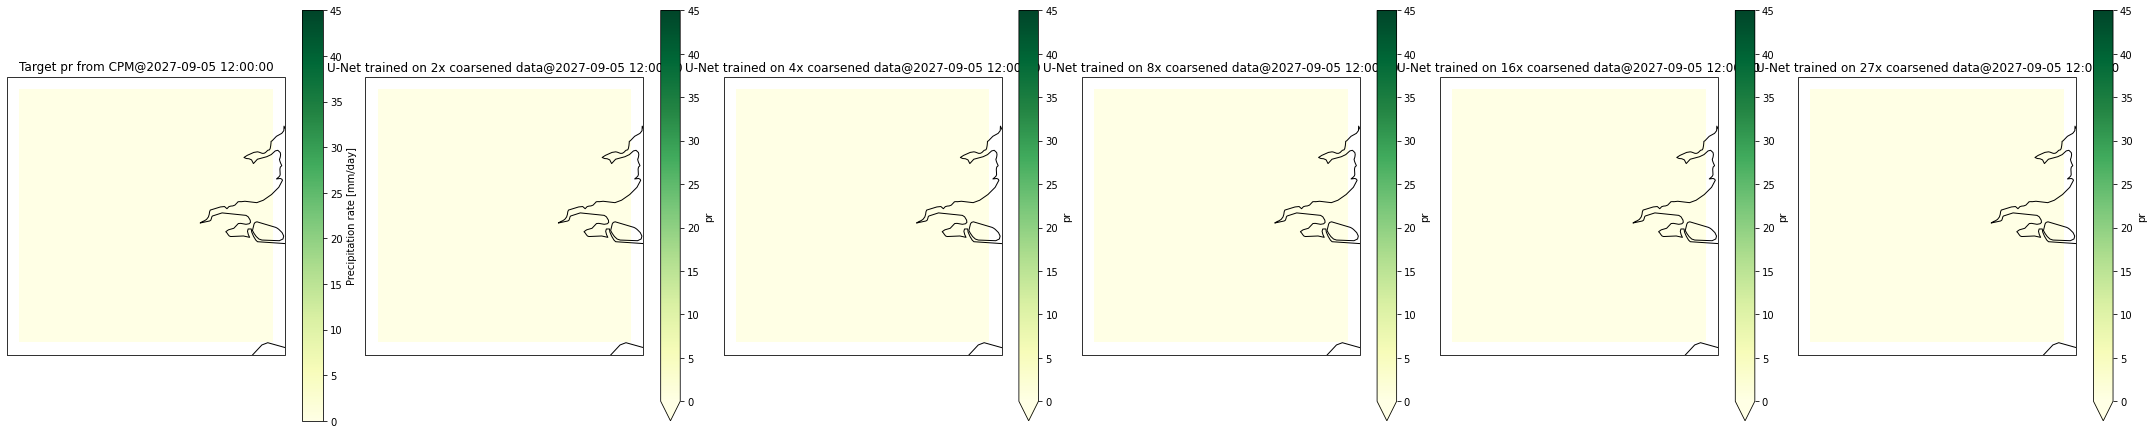

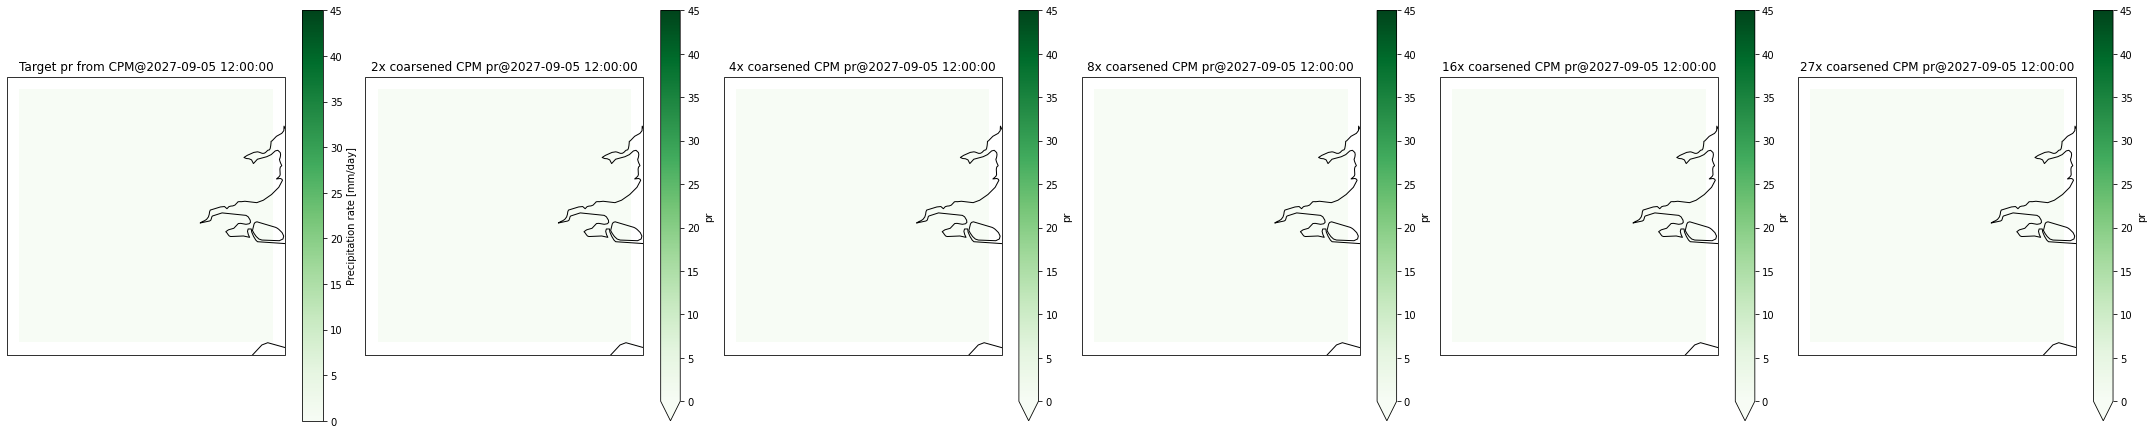

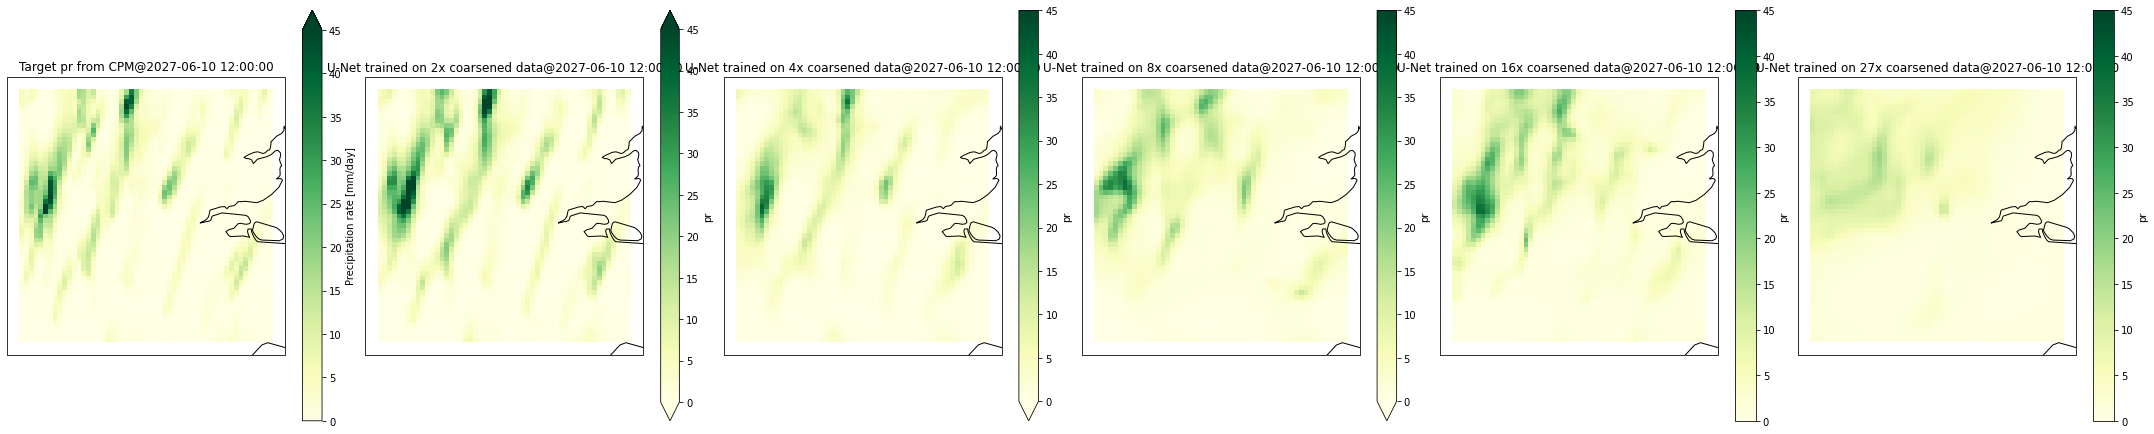

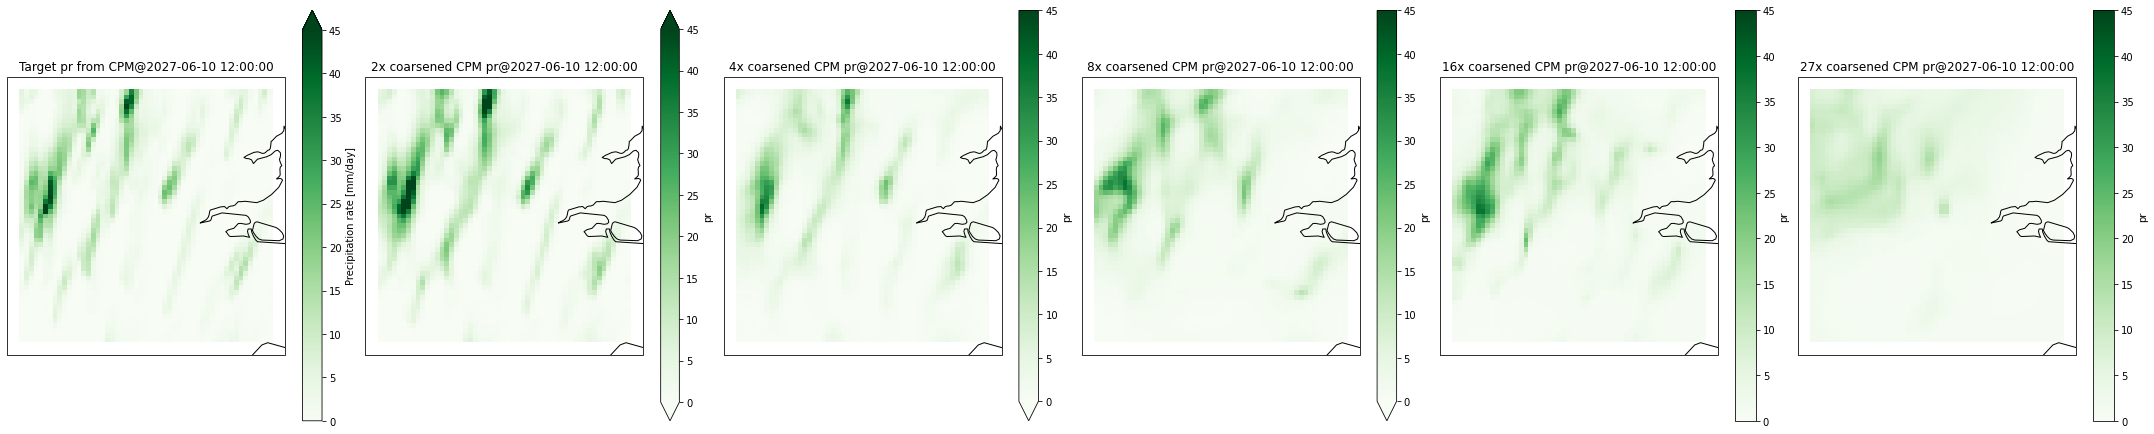

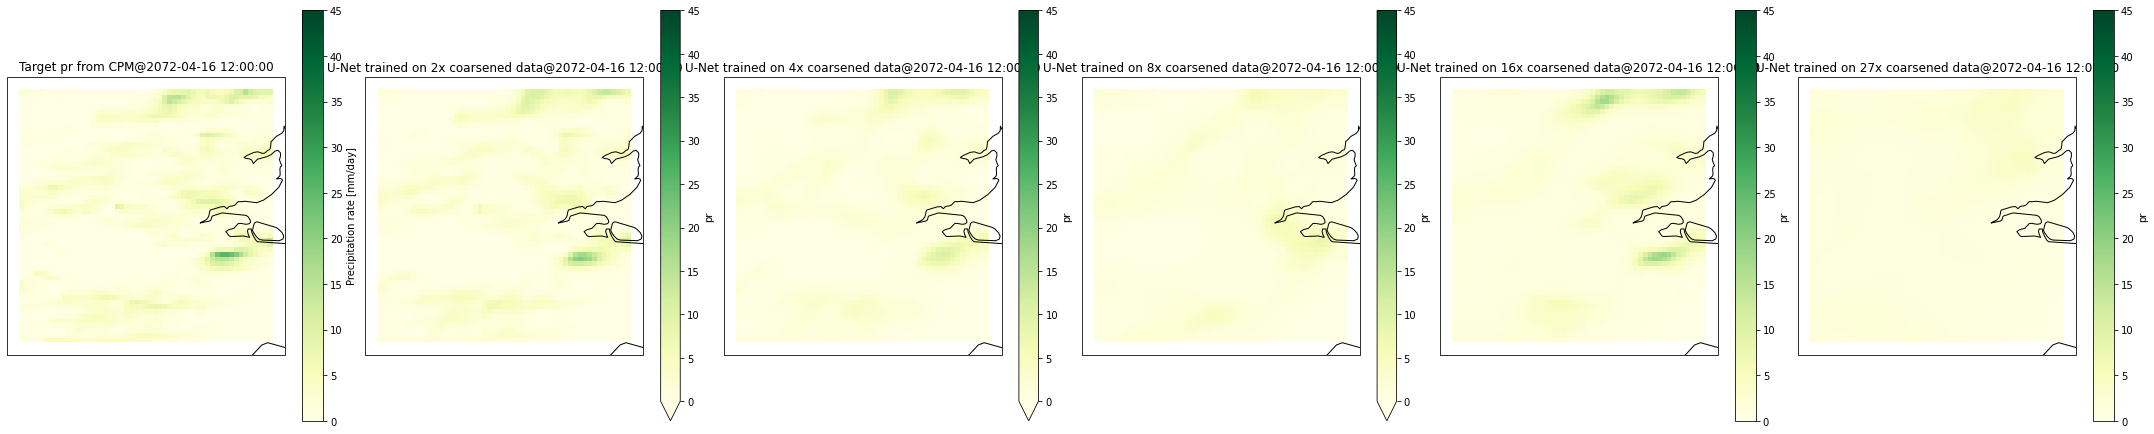

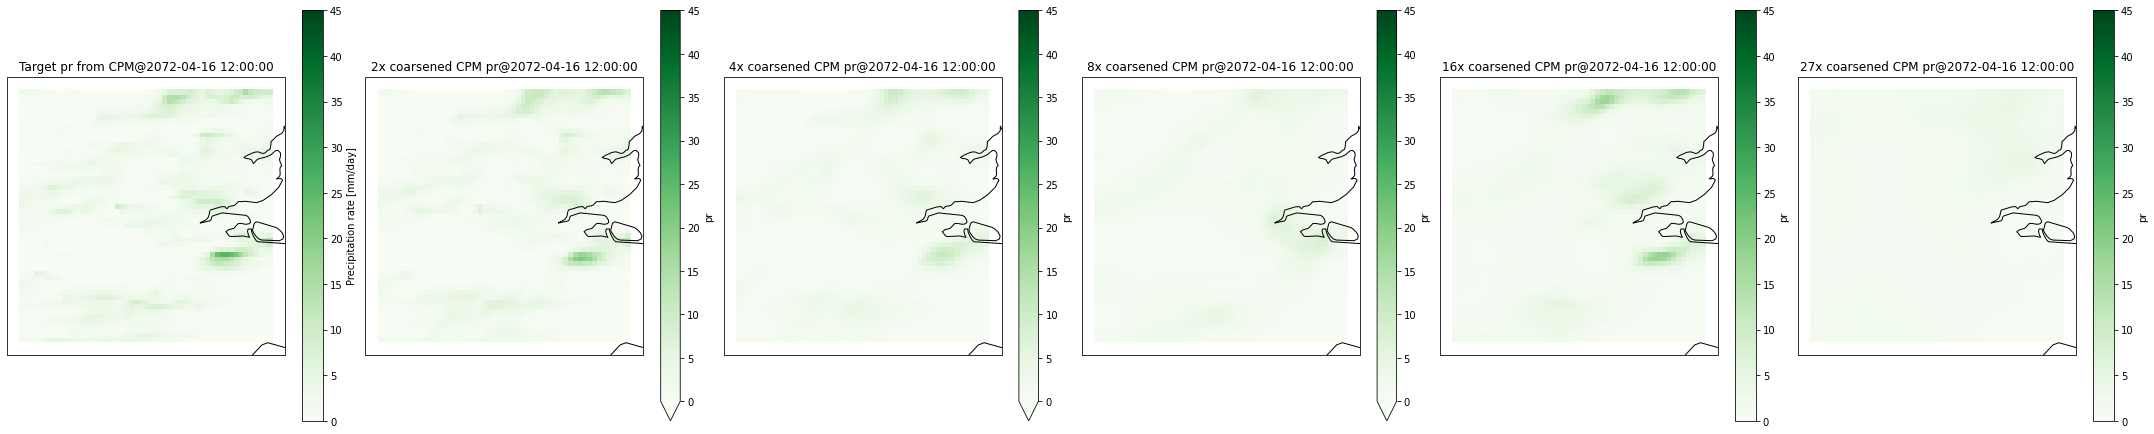

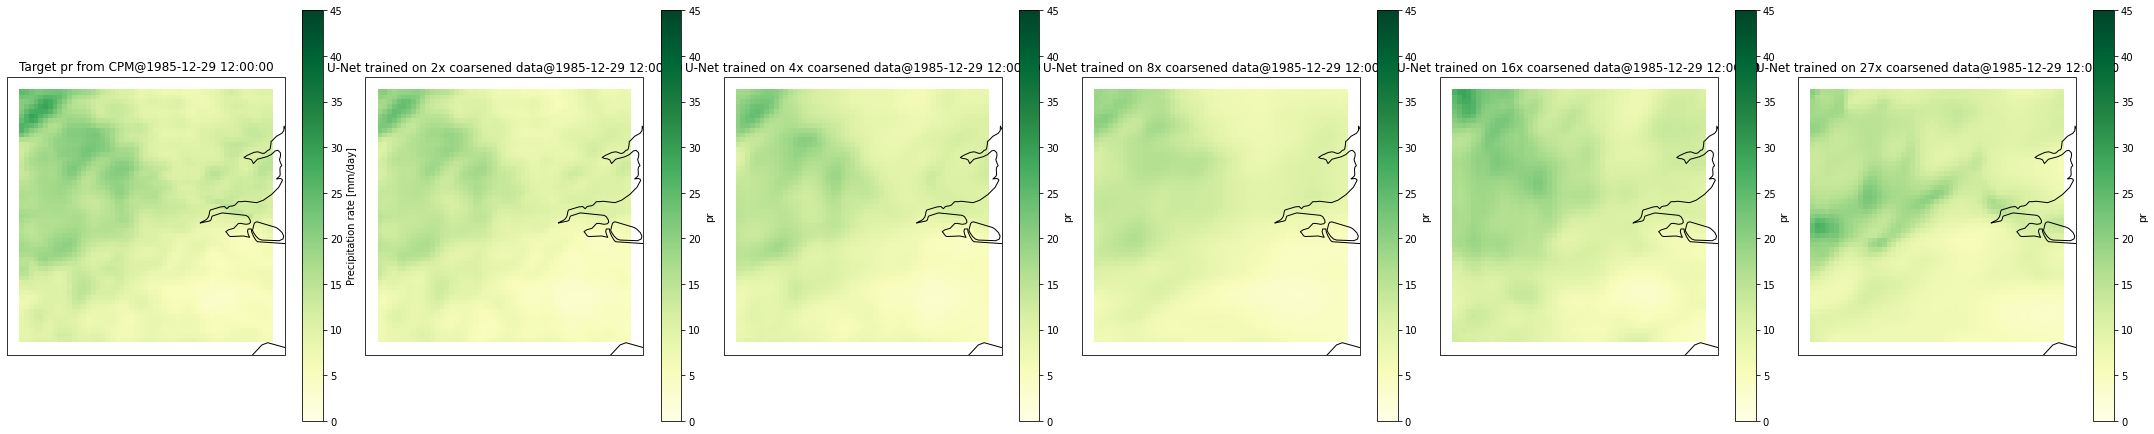

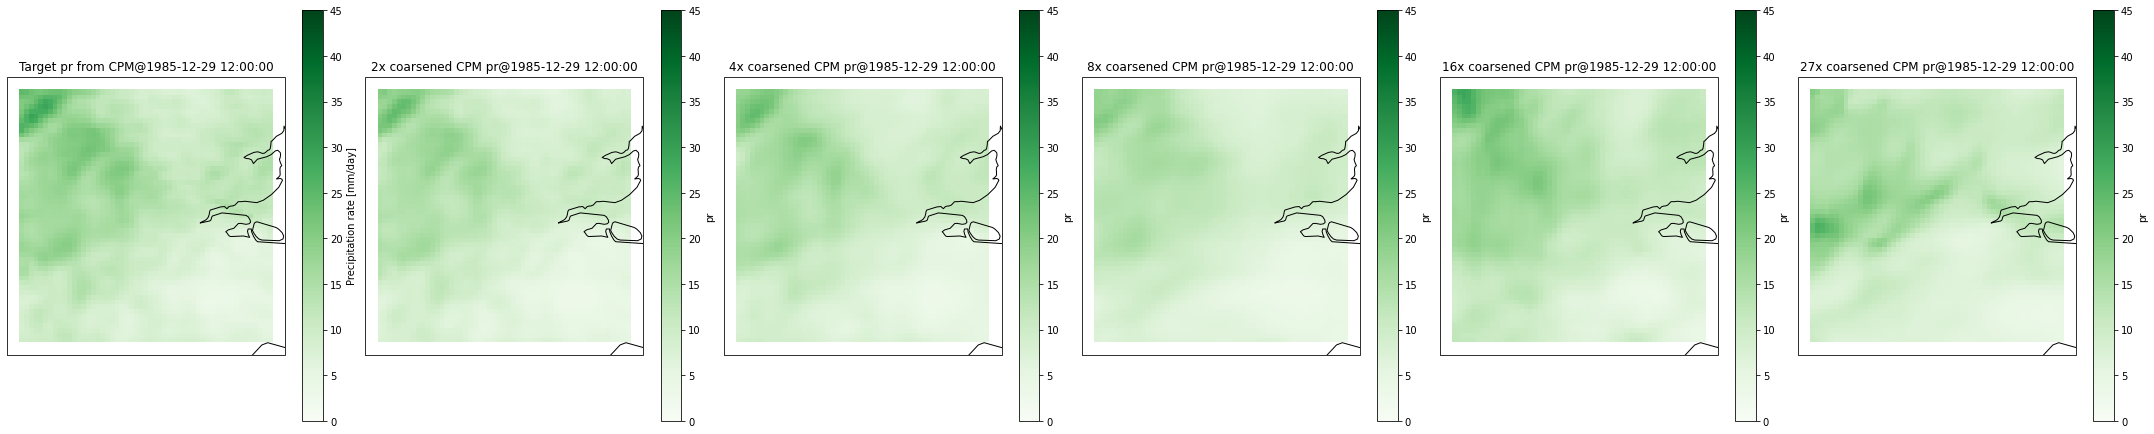

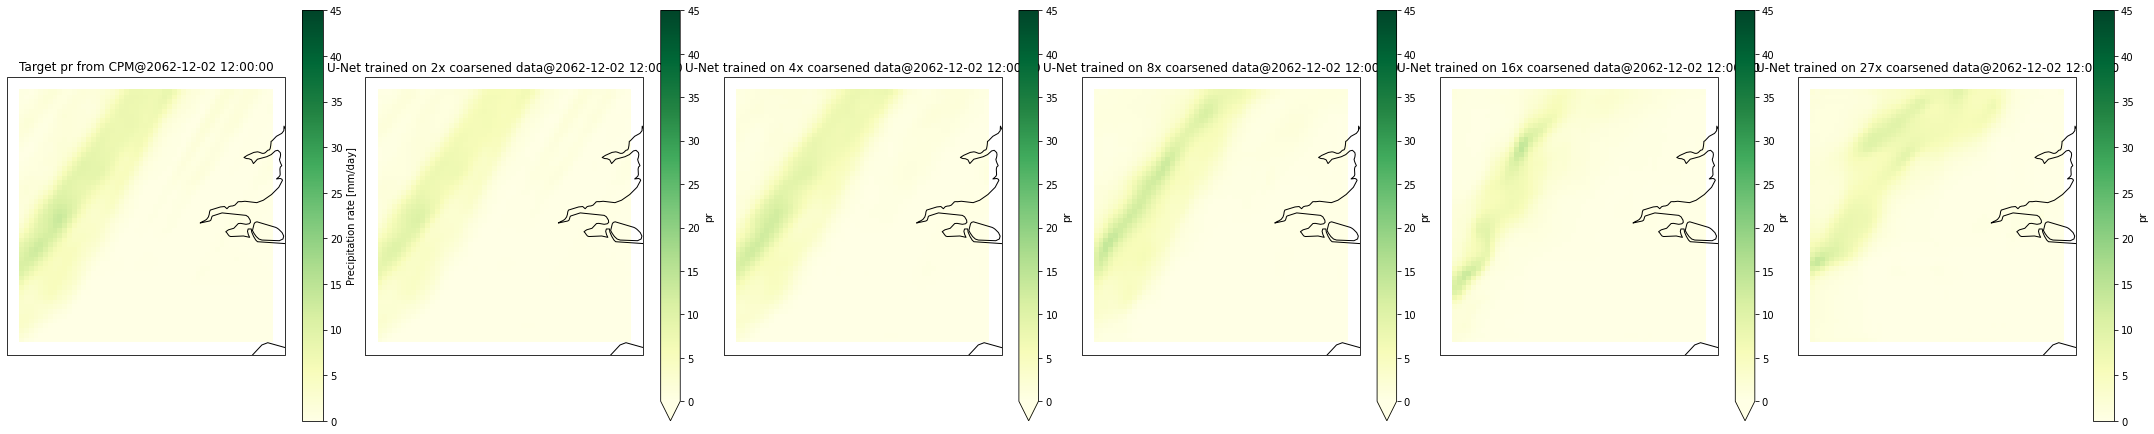

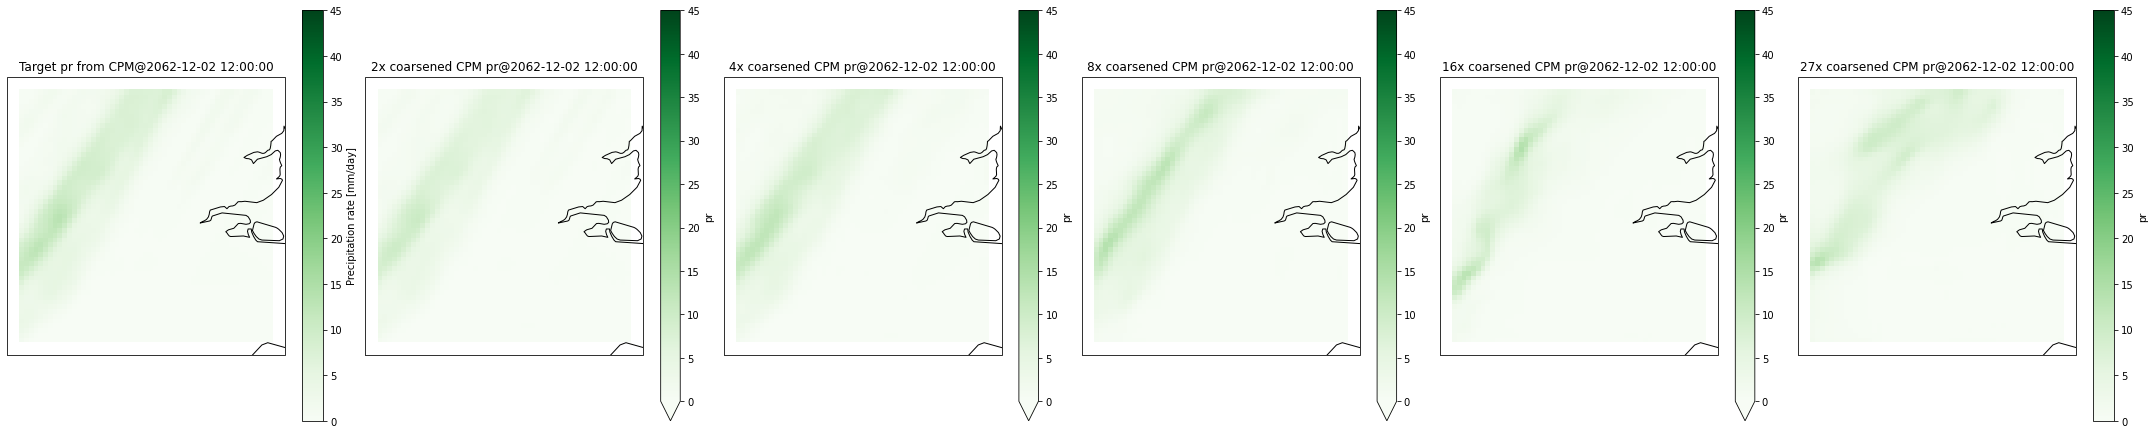

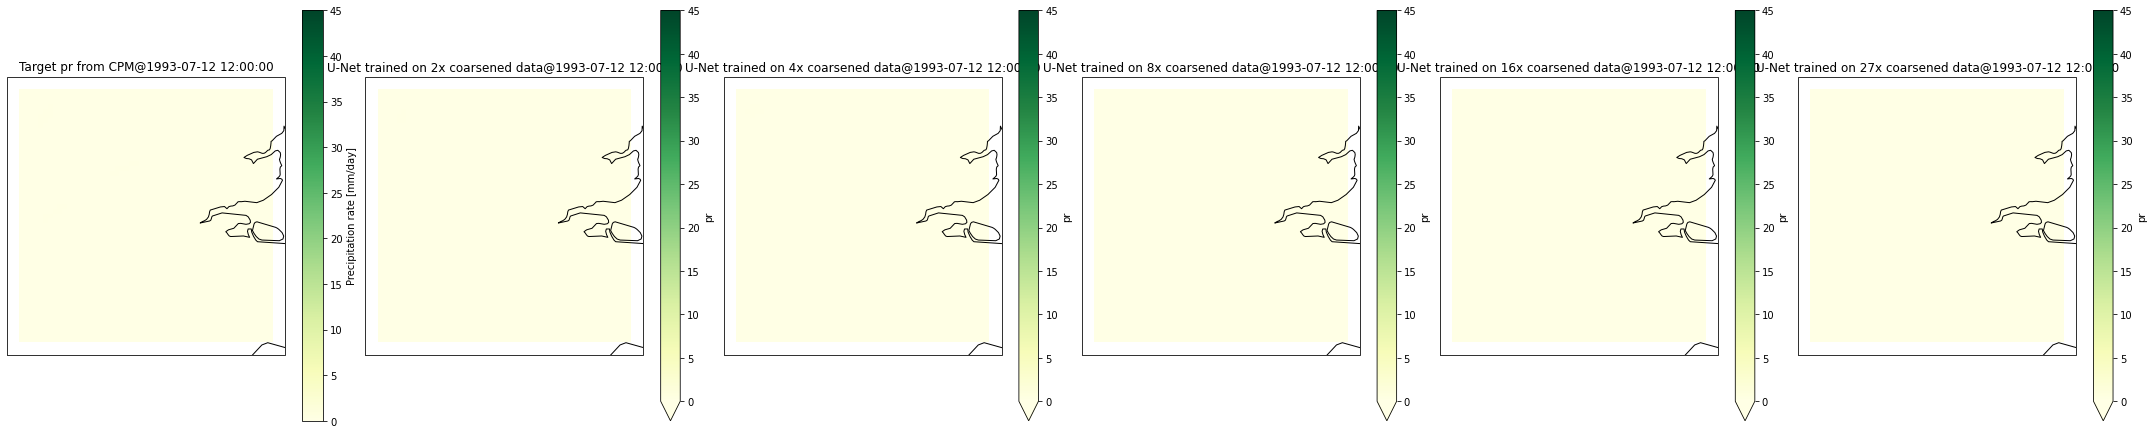

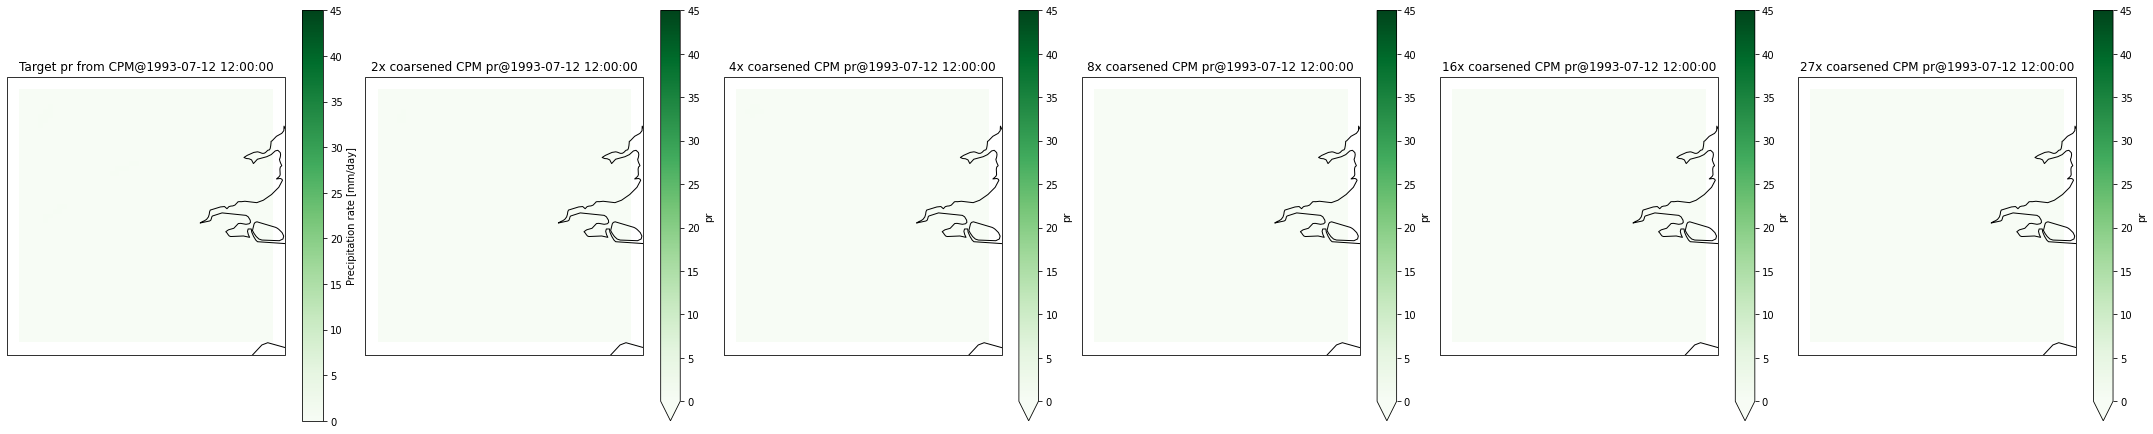

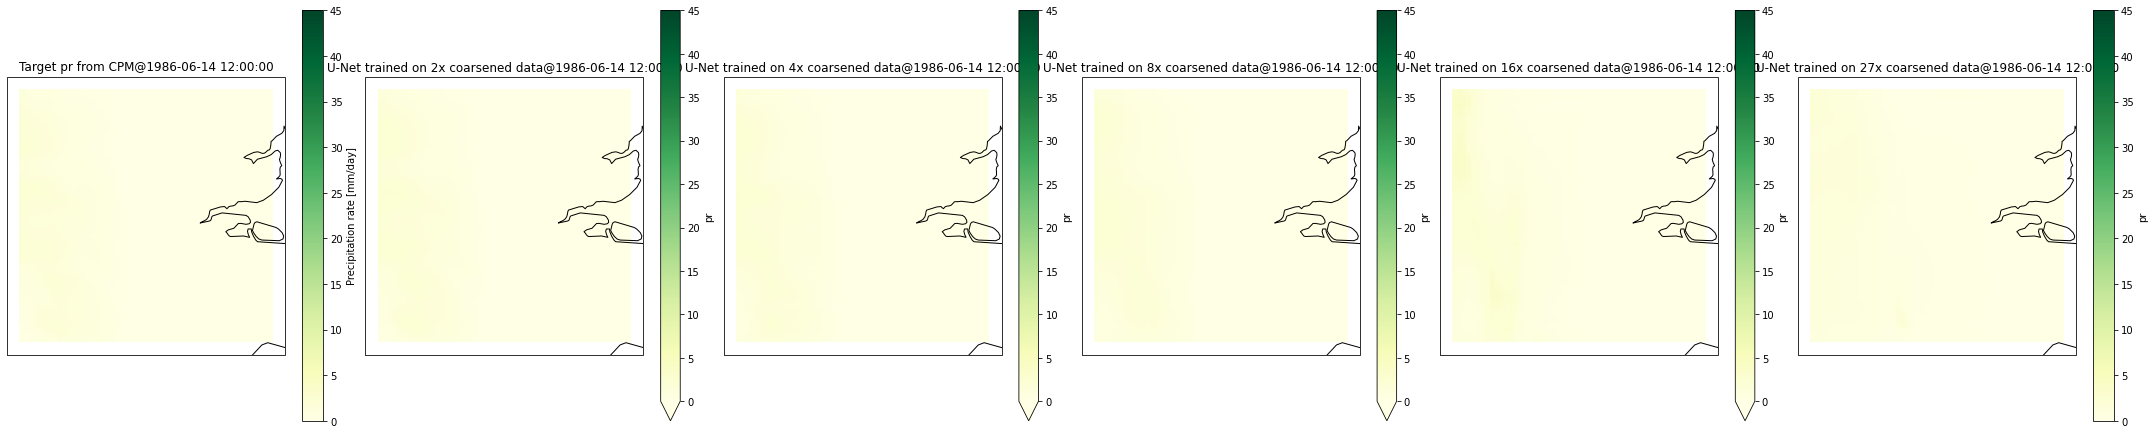

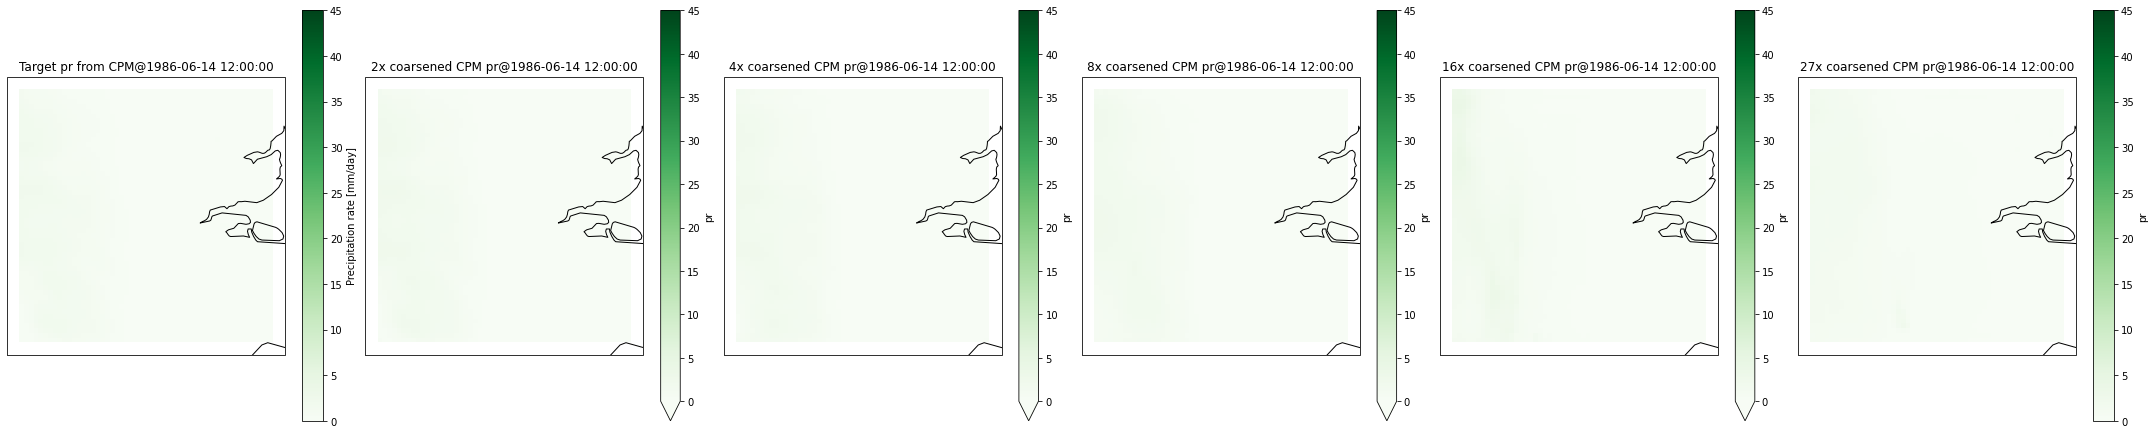

In [47]:
rng = np.random.default_rng(seed=42)
timestamps = rng.choice(test_sets[2].time, 10)

unet_datasets = [test_sets[2].target_pr]+[preds["u-net"][sf]['pr'] for sf in [2,4,8,16,27]]
input_datasets = [test_sets[2].target_pr]+[test_sets[sf]['pr'] for sf in [2,4,8,16,27]]

vmax = 45 # max(*[ds.max().values for ds in unet_datasets+input_datasets])

for timestamp in timestamps:
    plots_at_ts(unet_datasets, timestamp, titles=["Target pr from CPM"]+[f"U-Net trained on {sf}x coarsened data" for sf in [2,4,8,16,27]], vmax=vmax)
    plots_at_ts(unet_datasets, timestamp, titles=["Target pr from CPM"]+[f"{sf}x coarsened CPM pr" for sf in [2,4,8,16,27]], vmax=vmax, cmap='Greens')